<a href="https://colab.research.google.com/github/aksha1234/akshay-/blob/master/Assignement_1_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
!pip install jovian --upgrade -q
import jovian
jovian.set_project('project')
jovian.set_colab_id('1cBxOde2aPUpDsS5-omsn3_e5pF_F9OCD')

     |████████████████████████████████| 68 kB 4.3 MB/s 


# Assignment 1


## Import Libraries

In [1]:
!pip install jovian --upgrade --quiet

     |████████████████████████████████| 68 kB 2.5 MB/s 


In [2]:
import jovian

In [42]:
import warnings
warnings.filterwarnings('ignore')

In [43]:
# Execute this to save new versions of the notebook
jovian.commit(project="project")

[jovian] Detected Colab notebook...


[jovian] Error: jovian.commit doesn't work on Colab unless the notebook was created and executed from Jovian.
Make sure to run the first code cell at the top after executing from Jovian.
Alternatively, you can download this notebook and upload it manually to Jovian.
Learn more: https://jovian.ai/docs/user-guide/run.html#run-on-colab


In [44]:
import pandas as pd

In [45]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 2. Loading Dataset

In [46]:
df=pd.read_excel('/content/car_following (1).xlsx')

In [7]:
df

,Time,"v(t,i-1)","x(t,i-1)","x(t,i)"
0,0,0,5000,-102.0
1,1,0,5000,NaN
2,2,0,5000,NaN
3,3,0,5000,NaN
4,4,0,5000,NaN
...,...,...,...,...
496,496,0,8762,NaN
497,497,0,8762,NaN
498,498,0,8762,NaN
499,499,0,8762,NaN


## Reassigning the name to teh columns

In [47]:
df.columns=['time','v_(i-1)','x_(i-1)','x_i']

In [9]:
df

,time,v_(i-1),x_(i-1),x_i
0,0,0,5000,-102.0
1,1,0,5000,NaN
2,2,0,5000,NaN
3,3,0,5000,NaN
4,4,0,5000,NaN
...,...,...,...,...
496,496,0,8762,NaN
497,497,0,8762,NaN
498,498,0,8762,NaN
499,499,0,8762,NaN


In [48]:
a_higher=4
a_lower=-6
v_desired=30

In [11]:
df

,time,v_(i-1),x_(i-1),x_i
0,0,0,5000,-102.0
1,1,0,5000,NaN
2,2,0,5000,NaN
3,3,0,5000,NaN
4,4,0,5000,NaN
...,...,...,...,...
496,496,0,8762,NaN
497,497,0,8762,NaN
498,498,0,8762,NaN
499,499,0,8762,NaN


In [49]:
sam={}
for value in range(0,10):
  sam[value]=['x_i'+str(value),'s_i'+str(value),'s_imin'+str(value),'v_i'+str(value)]
  

In [50]:
data=[]
for val in sam:
  for items in sam[val]:
    data.append(items)

In [51]:
data;

In [52]:
df=pd.concat([df.drop(columns=['x_i'],axis=1),pd.DataFrame(columns=data)])

In [53]:
df

,time,v_(i-1),x_(i-1),x_i0,s_i0,s_imin0,v_i0,x_i1,s_i1,s_imin1,v_i1,x_i2,s_i2,s_imin2,v_i2,x_i3,s_i3,s_imin3,v_i3,x_i4,s_i4,s_imin4,v_i4,x_i5,s_i5,s_imin5,v_i5,x_i6,s_i6,s_imin6,v_i6,x_i7,s_i7,s_imin7,v_i7,x_i8,s_i8,s_imin8,v_i8,x_i9,s_i9,s_imin9,v_i9
0,0.0,0.0,5000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,0.0,5000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,0.0,5000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.0,0.0,5000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.0,0.0,5000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,496.0,0.0,8762.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
497,497.0,0.0,8762.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
498,498.0,0.0,8762.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
499,499.0,0.0,8762.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
new_cols=df.columns[3:]

In [55]:
new_cols

Index(['x_i0', 's_i0', 's_imin0', 'v_i0', 'x_i1', 's_i1', 's_imin1', 'v_i1',
       'x_i2', 's_i2', 's_imin2', 'v_i2', 'x_i3', 's_i3', 's_imin3', 'v_i3',
       'x_i4', 's_i4', 's_imin4', 'v_i4', 'x_i5', 's_i5', 's_imin5', 'v_i5',
       'x_i6', 's_i6', 's_imin6', 'v_i6', 'x_i7', 's_i7', 's_imin7', 'v_i7',
       'x_i8', 's_i8', 's_imin8', 'v_i8', 'x_i9', 's_i9', 's_imin9', 'v_i9'],
      dtype='object')

In [56]:
df[new_cols]=0

In [71]:
i=-102
for cols in df.columns[df.columns.str.startswith('x_i')]:
  df[cols][0]=i
  i=i-20

In [72]:
df

,time,v_(i-1),x_(i-1),x_i0,s_i0,s_imin0,v_i0,x_i1,s_i1,s_imin1,v_i1,x_i2,s_i2,s_imin2,v_i2,x_i3,s_i3,s_imin3,v_i3,x_i4,s_i4,s_imin4,v_i4,x_i5,s_i5,s_imin5,v_i5,x_i6,s_i6,s_imin6,v_i6,x_i7,s_i7,s_imin7,v_i7,x_i8,s_i8,s_imin8,v_i8,x_i9,s_i9,s_imin9,v_i9
0,0.0,0.0,5000.0,-102,0,0,0,-122,0,0,0,-142,0,0,0,-162,0,0,0,-182,0,0,0,-202,0,0,0,-222,0,0,0,-242,0,0,0,-262,0,0,0,-282,0,0,0
1,1.0,0.0,5000.0,-140,5140,6,0,-160,5160,6,0,-180,5180,6,0,-200,5200,6,0,-220,5220,6,0,-240,5240,6,0,-260,5260,6,0,-280,5280,6,0,-300,5300,6,0,-320,5320,6,0
2,2.0,0.0,5000.0,-140,5140,6,0,-160,5160,6,0,-180,5180,6,0,-200,5200,6,0,-220,5220,6,0,-240,5240,6,0,-260,5260,6,0,-280,5280,6,0,-300,5300,6,0,-320,5320,6,0
3,3.0,0.0,5000.0,-140,5140,6,0,-160,5160,6,0,-180,5180,6,0,-200,5200,6,0,-220,5220,6,0,-240,5240,6,0,-260,5260,6,0,-280,5280,6,0,-300,5300,6,0,-320,5320,6,0
4,4.0,0.0,5000.0,-140,5140,6,0,-160,5160,6,0,-180,5180,6,0,-200,5200,6,0,-220,5220,6,0,-240,5240,6,0,-260,5260,6,0,-280,5280,6,0,-300,5300,6,0,-320,5320,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,496.0,0.0,8762.0,-140,8902,6,0,-160,8922,6,0,-180,8942,6,0,-200,8962,6,0,-220,8982,6,0,-240,9002,6,0,-260,9022,6,0,-280,9042,6,0,-300,9062,6,0,-320,9082,6,0
497,497.0,0.0,8762.0,-140,8902,6,0,-160,8922,6,0,-180,8942,6,0,-200,8962,6,0,-220,8982,6,0,-240,9002,6,0,-260,9022,6,0,-280,9042,6,0,-300,9062,6,0,-320,9082,6,0
498,498.0,0.0,8762.0,-140,8902,6,0,-160,8922,6,0,-180,8942,6,0,-200,8962,6,0,-220,8982,6,0,-240,9002,6,0,-260,9022,6,0,-280,9042,6,0,-300,9062,6,0,-320,9082,6,0
499,499.0,0.0,8762.0,-140,8902,6,0,-160,8922,6,0,-180,8942,6,0,-200,8962,6,0,-220,8982,6,0,-240,9002,6,0,-260,9022,6,0,-280,9042,6,0,-300,9062,6,0,-320,9082,6,0


In [82]:
for value in range(0,10):
  for rows in range(1,df.shape[0]):
    df['s_i'+str(value)][rows]=df['x_(i-1)'][rows-1]-df['x_i'+str(value)][rows-1]
    df['s_imin'+str(value)][rows]=6*(((df['v_i'+str(value)][rows-1])/4.47)+1)
    if df['s_i'+str(value)][rows] < df['s_imin'+str(value)][rows]:
      df['v_i'+str(value)][rows]=max(0,df['v_i'+str(value)][rows-1]+a_lower*1)
    else:
      df['v_i'+str(value)][rows]=min(v_desired,df['v_i'+str(value)][rows-1]+a_higher*1)
    df['x_i'+str(value)][rows]=df['x_i'+str(value)][rows-1]+df['v_i'+str(value)][rows]*1
      

In [83]:
df

,time,v_(i-1),x_(i-1),x_i0,s_i0,s_imin0,v_i0,x_i1,s_i1,s_imin1,v_i1,x_i2,s_i2,s_imin2,v_i2,x_i3,s_i3,s_imin3,v_i3,x_i4,s_i4,s_imin4,v_i4,x_i5,s_i5,s_imin5,v_i5,x_i6,s_i6,s_imin6,v_i6,x_i7,s_i7,s_imin7,v_i7,x_i8,s_i8,s_imin8,v_i8,x_i9,s_i9,s_imin9,v_i9
0,0.0,0.0,5000.0,-102,0,0,0,-122,0,0,0,-142,0,0,0,-162,0,0,0,-182,0,0,0,-202,0,0,0,-222,0,0,0,-242,0,0,0,-262,0,0,0,-282,0,0,0
1,1.0,0.0,5000.0,-98,5102,6,4,-118,5122,6,4,-138,5142,6,4,-158,5162,6,4,-178,5182,6,4,-198,5202,6,4,-218,5222,6,4,-238,5242,6,4,-258,5262,6,4,-278,5282,6,4
2,2.0,0.0,5000.0,-90,5098,11,8,-110,5118,11,8,-130,5138,11,8,-150,5158,11,8,-170,5178,11,8,-190,5198,11,8,-210,5218,11,8,-230,5238,11,8,-250,5258,11,8,-270,5278,11,8
3,3.0,0.0,5000.0,-78,5090,16,12,-98,5110,16,12,-118,5130,16,12,-138,5150,16,12,-158,5170,16,12,-178,5190,16,12,-198,5210,16,12,-218,5230,16,12,-238,5250,16,12,-258,5270,16,12
4,4.0,0.0,5000.0,-62,5078,22,16,-82,5098,22,16,-102,5118,22,16,-122,5138,22,16,-142,5158,22,16,-162,5178,22,16,-182,5198,22,16,-202,5218,22,16,-222,5238,22,16,-242,5258,22,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,496.0,0.0,8762.0,8794,-32,6,0,8794,-32,6,0,8794,-32,6,0,8794,-32,6,0,8794,-32,6,0,8794,-32,6,0,8794,-32,6,0,8794,-32,6,0,8794,-32,6,0,8794,-32,6,0
497,497.0,0.0,8762.0,8794,-32,6,0,8794,-32,6,0,8794,-32,6,0,8794,-32,6,0,8794,-32,6,0,8794,-32,6,0,8794,-32,6,0,8794,-32,6,0,8794,-32,6,0,8794,-32,6,0
498,498.0,0.0,8762.0,8794,-32,6,0,8794,-32,6,0,8794,-32,6,0,8794,-32,6,0,8794,-32,6,0,8794,-32,6,0,8794,-32,6,0,8794,-32,6,0,8794,-32,6,0,8794,-32,6,0
499,499.0,0.0,8762.0,8794,-32,6,0,8794,-32,6,0,8794,-32,6,0,8794,-32,6,0,8794,-32,6,0,8794,-32,6,0,8794,-32,6,0,8794,-32,6,0,8794,-32,6,0,8794,-32,6,0


In [112]:
position_cols=list(df.columns[df.columns.str.startswith('x_i')])

In [125]:
velocity_cols=list(df.columns[df.columns.str.startswith('v_i')])

In [84]:
import seaborn as sns

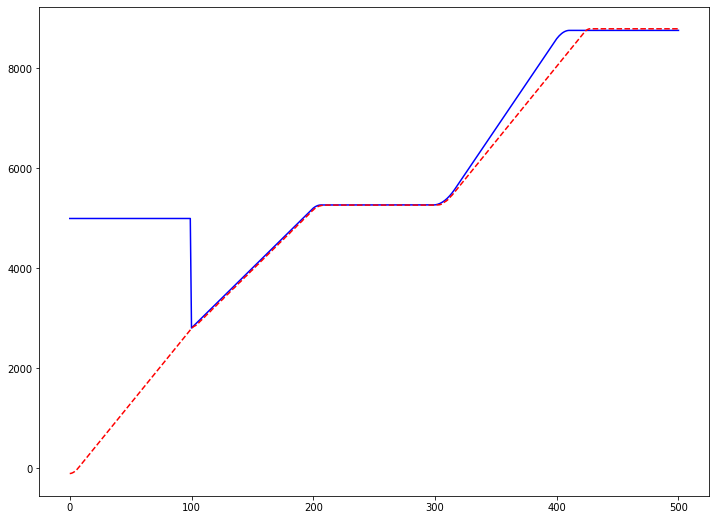

In [86]:
plt.figure(figsize=(12,9))
plt.plot('time','x_(i-1)','b-',data=df)
plt.plot('time','x_i0','r--',data=df)


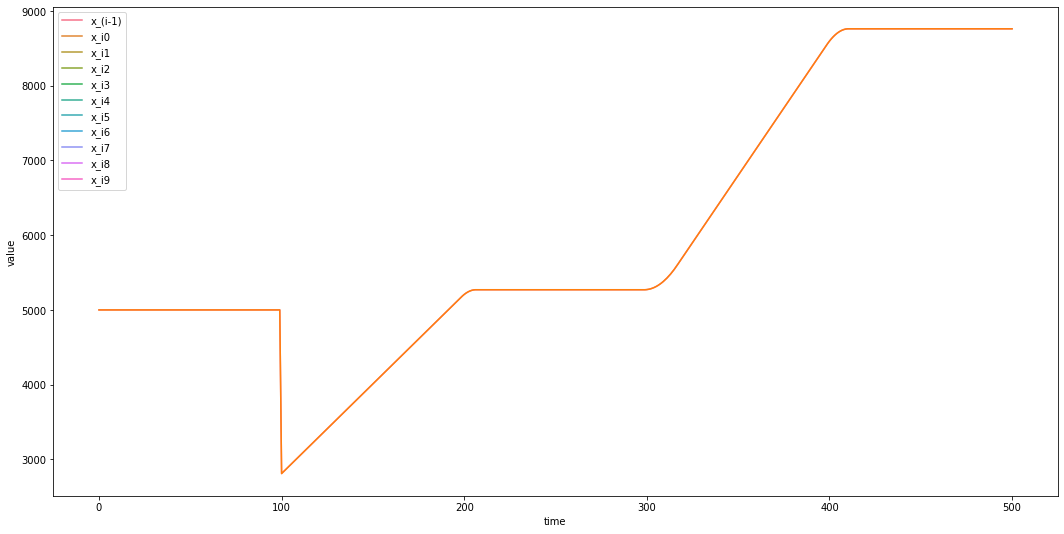

In [110]:
plt.figure(figsize=(18,9))
sns.lineplot(data=df.melt(value_vars=position_cols,var_name='position',value_name='value'),x=df['time'],y='value',hue='position')
sns.lineplot(data=df,x='time',y='x_(i-1)')

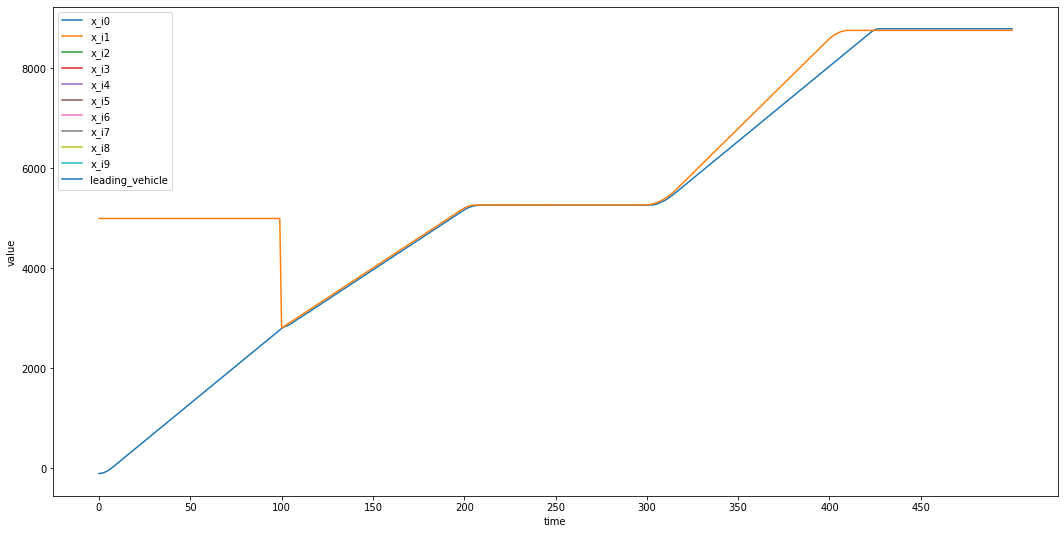

In [124]:
plt.figure(figsize=(18,9))
sns.lineplot(data=df.melt(value_vars=position_cols,var_name='position',value_name='value'),x=df['time'],y='value',hue='position',dashes=True)
sns.lineplot(data=df,x='time',y='x_(i-1)')
plt.xticks(np.arange(0,500,50))
plt.legend(position_cols+['leading_vehicle'])
plt.savefig('position.jpg',dpi=150)


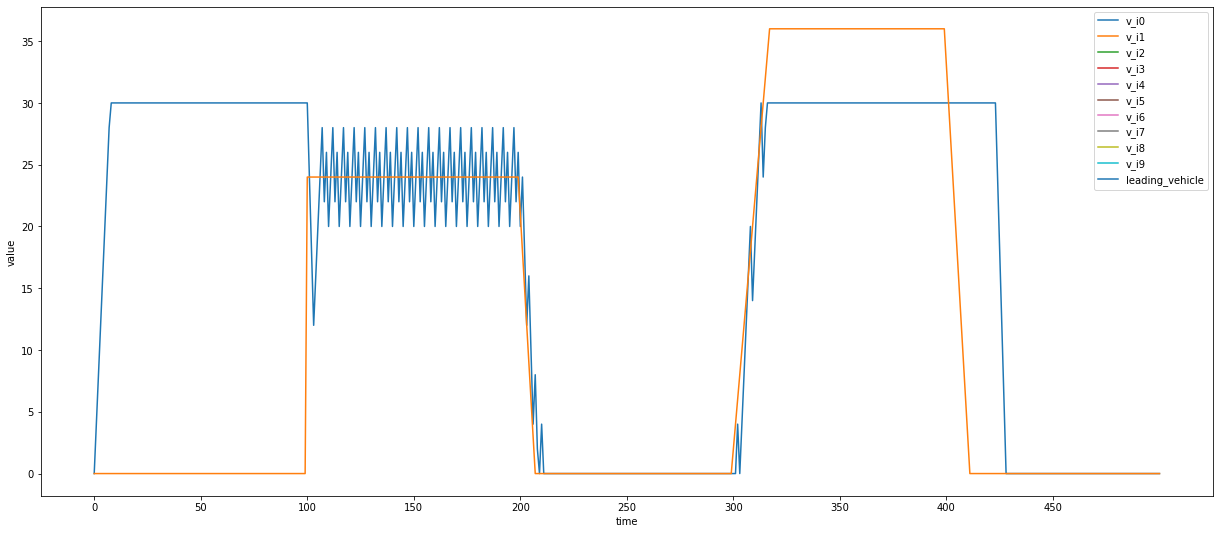

In [126]:
plt.figure(figsize=(21,9))
sns.lineplot(data=df.melt(value_vars=velocity_cols,var_name='velocity',value_name='value'),x=df['time'],y='value',hue='velocity',dashes=True)
sns.lineplot(data=df,x='time',y='v_(i-1)')
plt.xticks(np.arange(0,500,50))
plt.legend(velocity_cols+['leading_vehicle'])
plt.savefig('velocity.jpg',dpi=200)

In [115]:
df.to_csv('assignment_1_new.csv')

In [127]:
jovian.commit()

[jovian] Detected Colab notebook...


[jovian] Error: jovian.commit doesn't work on Colab unless the notebook was created and executed from Jovian.
Make sure to run the first code cell at the top after executing from Jovian.
Alternatively, you can download this notebook and upload it manually to Jovian.
Learn more: https://jovian.ai/docs/user-guide/run.html#run-on-colab
